In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Ejercicio 1. DescompLU


## a) Función descompLU



Función descompLU: Es la que utiliza el usuario. Hace un primer control para que se verifique que el input sea una matriz cuadrada, y luego usará funciones auxiliares para conseguir la descomposición $LU$.

----------------------------

- **Input**: Matriz A $\in R^{nxn}$.

- **Output**: Matrices $L, U \in R^{nxn}$, correspondientes a la descomposición $A = LU$, o bien matrices $Id$ y $A$, en caso de que se haya encontrado un cero en la diagonal en el proceso de descomposición $LU$.

In [ ]:
def descompLU(A):
  n= A.shape[0]

  #Chequeamos que sea una matriz cuadrada, ya que el enunciado indica R^n*n
  if A.shape != (n,n):
    print("La matriz no es cuadrada")

  #Usamos una función auxiliar que calcula la descomposición LU
  else:
    L, U = armadoLU(A)

  #Chequeamos si la recursión continuó su curso, o se detuvo, de acuerdo a si hubo o no ceros en la diagonal. Si se detuvo, armadoLU devuelve
  #una matriz L que tendrá ceros en la diagonal. En este caso se devuelve la Identidad y A
  #Seleccionamos la matriz L para el control de ceros en la diagonal y no U debido a que U podría tener un cero en la posición Unn sin afectar la descompLU
    if np.any(np.diag(L) == 0):
      id = np.identity(n,dtype=float)
      print("ERROR: La matriz U que se obtiene, posee 1 o más ceros en su diagonal! Se devuelve Matriz Identidad y la Matriz Ingresada.")

  #Devolvemos Identidad y A en caso de que hayamos encontrado ceros en la función auxiliar control_de_ceros
      return id, A

  #Devolvemos las matrices L y U en caso de que no hayamos encontrado ceros
    else:
      return L, U


## b) Función armadoLU

Función Auxiliar armadoLU: arma la descomposición $LU$ por medio de recursión sobre $L_{22}U_{22}$.

Notar que al hacer la recursión las matrices se van reduciendo hasta que llegamos a una matriz de 1x1, donde entrará en el caso base.

-----------------------------------------------

- **Input**: Matriz A $\in R^{nxn}$.

- **Output**: Matrices $L,U \in R^{nxn}$ correspondientes a la descomposición $A = LU$

In [ ]:
def armadoLU(A):
  n= A.shape[0]
  L = np.zeros((n, n))
  U = np.zeros((n, n))

  #Caso base de la recursión
  if n == 1:
    L = np.array([[1]])
    U = np.array(A)
  else:

  #Datos de matriz A
    A12 = A[0,1:]
    A21 = A[1:,0]
    A22 = A[1:,1:]
    a11 = A[0,0]

  # Verifica si a11 es igual a 0, de ser así corta recursión, para no dividir por cero, y devuelve matrices L y U armadas hasta el momento
    if a11 == 0:
        return L, U

  #Datos para armado según esquema del enunciado
    u11 = a11
    U12 = np.array([A12])
    L21 = np.array([A21/u11])
    L22U22 = A22 - L21.T@U12

  #Usamos un pensamiento recursivo sobre L22U22 para calcular los bloques que nos faltan
    L22 ,U22 = armadoLU(L22U22)

  #Armamos matriz L
    L[1:, 1:] = L22
    L[0,0] = 1
    L[1:,0] = L21

  #Armamos matriz U
    U[1:, 1:] = U22
    U[0,:] = A[0,:]



  return L, U





## ** Ejemplo de prueba

Vamos a testear descompLU para diferentes matrices.

- A se puede descomponer en $LU$

- B no se puede descomponer en $LU$, debido a que al triangular en la posición $b_{22}$ obtenemos un 0.

- C es una matriz más grande que se puede descomponer en $LU$.

In [ ]:
#Prueba
A = np.array([[2, 1, -1],
              [-3, -2, 2],
              [-2, 1, 2]])


B = np.array([[2, 1, -1],
              [-3, -3/2, 2],
              [-2, 1, 2]])


C = np.array([
    [2, 3, 1, 5],
    [6, 13, 5, 19],
    [2, 19, 10, 23],
    [4, 10, 11, 31]
])

print("L de A\n", descompLU(A)[0], "\n")
print("U de A\n", descompLU(A)[1], "\n")

print("L de B\n", descompLU(B)[0], "\n")
print("U de B\n", descompLU(B)[1], "\n")

print("L de C\n", descompLU(C)[0], "\n")
print("U de C\n", descompLU(C)[1], "\n")



L de A
 [[ 1.   0.   0. ]
 [-1.5  1.   0. ]
 [-1.  -4.   1. ]] 

U de A
 [[ 2.   1.  -1. ]
 [ 0.  -0.5  0.5]
 [ 0.   0.   3. ]] 

ERROR: La matriz U que se obtiene, posee 1 o más ceros en su diagonal! Se devuelve Matriz Identidad y la Matriz Ingresada.
L de B
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

ERROR: La matriz U que se obtiene, posee 1 o más ceros en su diagonal! Se devuelve Matriz Identidad y la Matriz Ingresada.
U de B
 [[ 2.   1.  -1. ]
 [-3.  -1.5  2. ]
 [-2.   1.   2. ]] 

L de C
 [[1. 0. 0. 0.]
 [3. 1. 0. 0.]
 [1. 4. 1. 0.]
 [2. 1. 7. 1.]] 

U de C
 [[2. 3. 1. 5.]
 [0. 4. 2. 4.]
 [0. 0. 1. 2.]
 [0. 0. 0. 3.]] 



# Ejercicio 3. ResolverLU

Queremos calcular el $x$ de $Ax = b$

Recordemos que tenemos una función que dado un A, obtenemos su $LU$.

Entonces esto es lo mismo que decir:

 $L \cdot Ux = b$

Por lo que podemos separar los cálculos en 2 etapas:

 $Ly = b    $

Y luego

 $Ux = y$

 -------------------------------------------



- **Input**: Matriz A $\in R^{nxn}$, vector $ b \in R^n$.

- Output: vector $x \in R^n$.


In [ ]:
def resolverLU(A, b):         #Recibe una Matriz A (nxn) y un vector b (n), y devuelve el x de Ax = b

  #Creo la identidad tamaño n
  id = np.identity(A.shape[0])

  #Si b no tiene la misma cantidad de columnas que A
  if (A.shape[0] != b.shape[0]):
    print("b no tiene tamaño n")

  else:
    L, U = descompLU(A)


    #Caso en el que A no tiene descomposicion LU, es decir que descompLU nos devuelve "Id" y "A"
    if (np.array_equal(L, id)):
        print("No tiene composicion LU ")

    else:
      #Sabemos que Ly = b, por lo tanto, y = (L^-1)b
      y = sp.linalg.solve_triangular(L, b, lower = True)

      #Sabemos tambien que Ux = y, por lo tanto, x = (U^-1)y
      x = sp.linalg.solve_triangular(U, y)

      return x




#  sp.linalg.solve_triangular(L, b) resuelve el sistema Ly = b para "y"


## ** Ejemplo

Obtenemos $x$ de la ecuación $Ax = b$ por medio de la descomposición $LU$.

In [ ]:
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])


b = np.array([[10], [20], [30]])


print("ResolverLU(A, b): \n",resolverLU(A, b))

ResolverLU(A, b): 
 [[ 70.]
 [-30.]
 [100.]]


# Ejercicio 4. Error relativo resolverLU

## a) Crear Inputs


Veamos qué pasa al calcular resolverLU para una matriz $A \in R^{10x10}$ y un vector $b \in R^{10}$, los dos con números aleatorios entre [-1, 1).



In [ ]:
#Me guardo valores randoms para utilizar mas eficientemente como ejemplos
np.random.seed(534544)

#Tomo Matriz A (10 x 10) aleatoria y vector b (10 x 1) aleatorio con valores [-1, 1)
A = np.random.uniform(-1, 1, (10, 10))
b = np.random.uniform(-1, 1, 10)


print("Matriz A:\n",A, "\n")
print("Vector b:\n",b, "\n")

#Resuelvo
print("resolucion LU:\n", resolverLU(A, b))

Matriz A:
 [[-0.36848123  0.31626621 -0.58553379  0.15526094 -0.76214237  0.15892893
   0.86129362 -0.26818593 -0.03120039  0.06230066]
 [-0.02047994 -0.57212863 -0.08695614  0.60566638 -0.91976235  0.57358552
   0.14781117  0.36536788 -0.01638392 -0.66139772]
 [ 0.790849   -0.66290608 -0.08985726 -0.31614921 -0.98804027 -0.70230136
   0.92431134  0.52558456 -0.88167534  0.3184132 ]
 [ 0.47673631 -0.72333306 -0.83210951 -0.15626308  0.47544631  0.5475087
  -0.94516736  0.25068724  0.61287554 -0.46389331]
 [ 0.37080722  0.35842847 -0.29444004  0.50708521 -0.46967967 -0.47431085
   0.15489631  0.95965524  0.25106206  0.1976241 ]
 [-0.66047383  0.83685528 -0.95944555 -0.66359653  0.46875428  0.81962807
   0.24031009  0.52622626  0.42758303 -0.8986951 ]
 [ 0.89054807 -0.35527779  0.39174986  0.60400795 -0.81669921  0.08400157
  -0.86702825  0.96591343  0.61022202  0.64041746]
 [-0.48773393  0.98204668  0.68004909  0.3629442  -0.4753249  -0.42233932
   0.79009447  0.64408698 -0.80268157  0.

## b) Función error_norma2

Calculemos el error relativo:

$e = \frac{||{A} \bar{x} - b||_2 } {||b||_2}$

Recordemos que:

$||v||_2 = \sqrt{ v_1^2 + v_2^2 + ... + v_n^2}$

---------------------------------------

- **Input**: Matriz $A \in R^{nxn}$, Vector $b \in R^n$, vector $x \in R^n$.

- **Output**: error relativo (float)

In [ ]:
def error_norma2(A, b, x):

  #Guardo en numerador Ax-b
  superior = A@x - b

  #Aplico norma 2
  numerador = np.linalg.norm(superior)

  #Guardo en denominador la norma 2 de b
  denominador = np.linalg.norm(b)

  return numerador / denominador

Calculamos el error_norma2 de la matriz aleatoria A, su resolvente b y el x obtenido a partir de ResolverLU

In [ ]:
error_norma2(A,b, resolverLU(A,b))

2.6621199642659783e-15

# Ejercicio 5. Inversa


Vamos a calcular la inversa de una matriz $A \in R^{nxn}$ ayudándonos de:

1) La descomposición $LU$

2) La resolución triangular $Ly = b$ ; $Ux = y$

3) Los vectores canónicos ($e$)

----------------------------------------------------
- **Input**: Matriz $A \in R^{nxn}$ inversible.

- **Output**: Matriz $A^{-1} \in R^{nxn}$.

In [ ]:
def inversa(A):


  n = A.shape[0]
  m = A.shape[1]

  #Me fijo si la matriz A es cuadrada
  if (n != m):
    print("La matriz no es cuadrada!")

  else:
    #Genero una matriz igual tamaño que A pero de 0s, para luego guardar las columnas de la inversa
    matriz = np.zeros((n, n))
    L, U = descompLU(A)


    for i in range (n):
      #creo un e canonico cuyo 1 va a cambiar mediante la posicion de e[i]
      e = np.zeros(n)
      e[i] = 1

      #x me devuelve la columna i de la inversa
      y = sp.linalg.solve_triangular(L, e, lower = True)
      x = sp.linalg.solve_triangular(U, y)

      #Meto en la matriz la columna i de la inversa ( x )
      matriz[:,i] = x

    return matriz



## Ejemplo

Tomamos una matriz $A \in R^{3x3}$, calculamos su inversa (inversa($A$)) y comparamos nuestra inversa con la de numpy.



In [ ]:
#Prueba
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])

print("La inversa de A obtenida:\n", inversa(A), "\n")

print("Comparo con la inversa por numpy: \n", np.linalg.inv(A))

La inversa de A obtenida:
 [[ 4.  3. -1.]
 [-2. -2.  1.]
 [ 5.  4. -1.]] 

Comparo con la inversa por numpy: 
 [[ 4.  3. -1.]
 [-2. -2.  1.]
 [ 5.  4. -1.]]


#Ejercicio 6. Probar Inversa y Frobenius

## a) Crear Matriz aleatoria A

Donde $A \in R^{10x10}$


In [ ]:
#Tomo Matriz A (10 x 10) aleatoria con valores [-1, 1)
A = np.random.uniform(-1, 1, (10, 10))


print("Matriz A:\n",A, "\n")

#Resuelvo
print("inversa de A:\n", inversa(A), "\n")

Matriz A:
 [[ 0.67529329  0.97950116 -0.59142067  0.66913621  0.58533758 -0.75084625
  -0.34013714  0.86732329  0.75784799 -0.55190318]
 [-0.54030417  0.64215879  0.48431789 -0.95423305  0.20124512  0.15178431
  -0.11992516  0.11742875 -0.99362858  0.53334132]
 [-0.4059153   0.08401712  0.9576847   0.70736039  0.61336953 -0.3097397
  -0.89722559 -0.73790041  0.83400644  0.29462184]
 [ 0.40674659  0.3579493   0.75945619  0.12476061 -0.1823699  -0.86959683
  -0.71341191 -0.53668965  0.13689481 -0.31021388]
 [-0.97291316  0.59370434  0.35261475 -0.72918339  0.69389823  0.28065063
   0.04233513 -0.11163337  0.37929884  0.23741007]
 [-0.03898439  0.16450414 -0.5858111  -0.75799032  0.98398985  0.51585844
  -0.79249911 -0.57837258  0.82333751 -0.52502208]
 [-0.99406089 -0.54794295  0.99892108 -0.29976834  0.69393192  0.99303369
  -0.40892039  0.84652089  0.73339438  0.18810858]
 [-0.53871478 -0.47243479 -0.48018254  0.99528038  0.09386613 -0.07519042
   0.80537246  0.33538857 -0.34650795  0.

## b) Calcular el error Frobenius

  
El error Frobenius está dado por la ecuación:

- $|| {A}^{-1} @ {A} - Id||_F$

Para calcular la norma Frobenius pensamos en ir calculando la norma 2 de cada fila, e ir guardando los resultados en un nuevo vector, al cual luego le calculamos la norma 2, es decir, calculamos la norma 2 de la norma 2 de varios vectores (las filas). Esto es válido pues:


Sea

A = $\begin{pmatrix}
F_0\\
F_1\\
\vdots \\
F_n
\end{pmatrix}$

Entonces, la norma 2 para cada fila viene dada por:


$||F_i||_2 = \sqrt{ \sum_{j=1}^{n}|a_{ij}|^2}$

Con esto armamos un nuevo vector que tendrá el resultado de la norma 2 para la fila $F_i$ en el lugar i. Entonces, al calcular la norma dos de v tendremos:

$||v||_2 = \sqrt{ \sum_{i=1}^{n}||F_i||_2^2} = \sqrt{ \sum_{i=1}^{n}|\sqrt{ \sum_{j=1}^{n}|a_{ij}|^2}|^2} = \sqrt{ \sum_{i=1}^{n}{ \sum_{j=1}^{n}|a_{ij}|^2}} = ||A||_F $




-------------------------

- **Input**: Matriz $A \in R^{nxn}$

- **Output**: res (Float)

In [ ]:
def fro(A):

  #Vamos a llamar n el tamaño de las filas de A
  n = A.shape[0]

  #Obtenemos la inversa de A
  Ainv = inversa(A)

  #Generamos una identidad con el mismo tamaño de A
  id = np.identity(n)

  #Calculamos la fórmula escrita en el enunciado (A^−1 @ A − Id)
  formula = Ainv@A - id

  #Generamos un vector tamaño n, lleno de 0s.
  #Ésto nos servirá para ir calculando y guardando las normas-2 de cada fila de "fórmula"
  v = np.zeros(n)

  #Vamos a calcular la norma-2 para todas las filas de "fórmula" y las guardaremos en v
  for i in range (n):
    r = np.linalg.norm(formula[i])
    v[i] = r

  #Finalmente, calcularemos la norma-2 de todos los valores de v
  res = np.linalg.norm(v)

  return res

## Prueba

Probemos el error de norma Frobenius para la matriz $A \in R^{10x10}$ aleatoria que habíamos definido anteriormente.

In [ ]:
#Prueba

print("Matriz A:\n",A, "\n")

print("Matriz inversa de A:\n", inversa(A), "\n")

#Resuelvo
print("frobenius de A^−1 @ A − Id:\n", fro(A), "\n")


Matriz A:
 [[ 0.67529329  0.97950116 -0.59142067  0.66913621  0.58533758 -0.75084625
  -0.34013714  0.86732329  0.75784799 -0.55190318]
 [-0.54030417  0.64215879  0.48431789 -0.95423305  0.20124512  0.15178431
  -0.11992516  0.11742875 -0.99362858  0.53334132]
 [-0.4059153   0.08401712  0.9576847   0.70736039  0.61336953 -0.3097397
  -0.89722559 -0.73790041  0.83400644  0.29462184]
 [ 0.40674659  0.3579493   0.75945619  0.12476061 -0.1823699  -0.86959683
  -0.71341191 -0.53668965  0.13689481 -0.31021388]
 [-0.97291316  0.59370434  0.35261475 -0.72918339  0.69389823  0.28065063
   0.04233513 -0.11163337  0.37929884  0.23741007]
 [-0.03898439  0.16450414 -0.5858111  -0.75799032  0.98398985  0.51585844
  -0.79249911 -0.57837258  0.82333751 -0.52502208]
 [-0.99406089 -0.54794295  0.99892108 -0.29976834  0.69393192  0.99303369
  -0.40892039  0.84652089  0.73339438  0.18810858]
 [-0.53871478 -0.47243479 -0.48018254  0.99528038  0.09386613 -0.07519042
   0.80537246  0.33538857 -0.34650795  0.

# Observación

Notamos que cuanto más preciso es el cálculo de la fórmula, mas chico va a ser el error. Dándonos cada vez un valor más cercano al 0.

Ésto se debe a que $A^{−1} @ A $ tiende a devolver la $Id$.

Y como luego le restamos $Id$, en teoría debería devolver 0.

Al estar muchas veces utilizando matrices grandes o valores con punto flotante, pueden surgir errores de precisión. Ésto hace que la función nos devuelva un valor que no es 0, pero sí muy cercano.


# Ejercicio 7

Función experimento_ej7: Recibe como input el valor n máximo de las matrices nxn (el pedido es 200), siendo el mínimo 10x10. Devuelve los vectores v1 y v2 con la suma de los logartimos de los errores relativos de las 10 repeticiones para cada medida de matriz

---------------------------------------------


- **Input**: Entero (Int)

- **Output**: vectores $v_1, v_2  \in R^n$

In [ ]:
def experimento_ej7(m): #m denota hasta qué tamaño de matriz se quiere hacer (en el ej es hasta 200x200)
  #Generamos vectores v1 y v2 de ceros para ir grabando las sumas de los log de los errores de los items c y e
  v1 = np.zeros(m+1)
  v2 = np.zeros(m+1)

  for n in range (10,m+1): # medida de la matriz, desde 10x10 hasta lo indicado en input
    #Generamos un float para cada forma de cálculo (items b y d) donde iremos sumando los log de los errores
    suma_er1 = 0
    suma_er2 = 0

    for i in range (1,11): # las 10 repeticiones

      #ITEM 1

      #ITEM a Generamos matriz y vector aleatorios y calculamos b
      A = np.random.uniform(-1, 1, (n, n)) #Generamos la matriz aleatoria de nxn
      x = np.random.uniform(-1, 1, n) #Generamos el vector aleatorio x de tamaño n
      b = A@x #Definimos b

      #ITEM b Calculamos solución x1 mediante función ResolverLU
      x1 = resolverLU(A,b)

      #ITEM c Calculamos error relativo usando función error_norma2
      er1= error_norma2(A,b,x1)

      #ITEM d Calculamos solución x2 mediante x2=A^(-1)*b utilizando función inversa
      x2 = inversa(A)@b

      #ITEM e Calculamos error relativo usando función error_norma2
      er2= error_norma2(A,b,x2)

      #ITEM 2 Guardamos los errores relativos calculados mediante items b y c
      suma_er1 = suma_er1 + np.log(er1)
      #ITEM 3 Guardamos los errores relativos calculados mediante items d y e
      suma_er2 = suma_er2 + np.log(er2)

    #Agrego información en vector vi
    v1[n] = suma_er1
    v2[n] = suma_er2

  return v1 , v2

### Graficamos

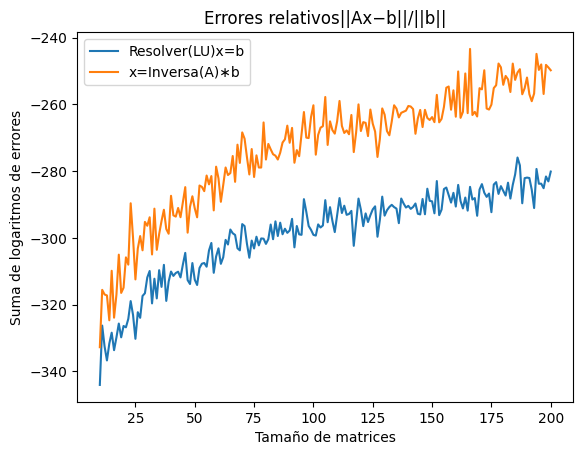

In [ ]:
v1, v2 = experimento_ej7(200)
n = np.arange(10, len(v1))
plt.plot(n,v1[10:],label='Resolver(LU)x=b')
plt.plot(n,v2[10:],label= 'x=Inversa(A)∗b')
plt.xlabel('Tamaño de matrices')
plt.ylabel('Suma de logaritmos de errores')
plt.title('Errores relativos||Ax−b||/||b||')
plt.legend( )
plt.show( )


## Conclusión Ej 7


Podemos observar que utilizando ResolverLU obtenemos un error relativo mucho menor que al hacer Inversa(A).

Esta diferencia se va agrandando a medida que el tamaño de la matriz crece.


Lo que nos dice que la precisión al hacer LU es mayor al calcular por la inversa computacionalmente.

Puede ser porque al hacer LU se realizan menos cuentas, ya que al resolver el sistema por medio de la inversa implica resolver un sistema de ecuaciones lineales para cada columna de la matriz inversa. Por el contrario, por medio de ResolverLU se utilizan dos matrices más simples (L y U) y se resuelven sistemas triangulares, lo que suele ser más eficiente, computacionalmente. Cuantas mas cuentas tengamos, mayor es el riesgo de que se arrastren y vayan acumulando errores por redondeos, sobre todo si la matriz posee un nro de condición elevado.

# Ejercicio 8

Función experimento_ej8: Recibe como input el valor n máximo de las matrices nxn con las cuales se desea realizar el experimento, siendo el mínimo matrices de 10x10. Devuelve los vectores $v_1$ y $v_2$ con la suma de los logartimos de los errores relativos entre las soluciones halladas y la solución original, de las 10 repeticiones para cada medida de matriz.

--------------------------------------------------

- **Input**: Entero (Int)

- **Output**: vectores $v_1, v_2  \in R^n$

In [ ]:
def experimento_ej8(m): #m denota hasta qué tamaño de matriz se quiere hacer (en el ej es hasta 200x200)
  #Generamos vectores v1 y v2 de ceros para ir grabando las sumas de los log de los errores de los items c y e
  v1 = np.zeros(m+1)
  v2 = np.zeros(m+1)

  for n in range (10,m+1): # medida de la matriz
    #Generamos un float para cada forma de cálculo (items b y d) donde iremos sumando los log de los errores
    suma_er1 = 0
    suma_er2 = 0
    id = np.identity(n,dtype=float)

    for i in range (1,11): # las 10 repeticiones

      #ITEM 1

      #ITEM a Generamos matriz y vector aleatorios y calculamos b
      A = np.random.uniform(-1, 1, (n, n)) #Generamos la matriz aleatoria de nxn
      x = np.random.uniform(-1, 1, n) #Generamos el vector aleatorio x de tamaño n
      b = A@x #Definimos b

      #ITEM b Calculamos solución x1 mediante función ResolverLU
      x1 = resolverLU(A,b)

      #ITEM c Calculamos error relativo de la solución x1 vs la solución original, usando función error_norma2
      er1= error_norma2(id,x,x1)

      #ITEM d Calculamos solución x2 mediante x2=A^(-1)*b utilizando función inversa
      x2 = inversa(A)@b

      #ITEM e Calculamos error relativo de la solución x2 vs la solución original, usando función error_norma2
      er2= error_norma2(id,x,x2)

      #ITEM 2 Guardamos los errores relativos calculados mediante items b y c
      suma_er1 = suma_er1 + np.log(er1)
      #ITEM 3 Guardamos los errores relativos calculados mediante items d y e
      suma_er2 = suma_er2 + np.log(er2)

    #Agrego información en vector vi
    v1[n] = suma_er1
    v2[n] = suma_er2

  return v1 , v2

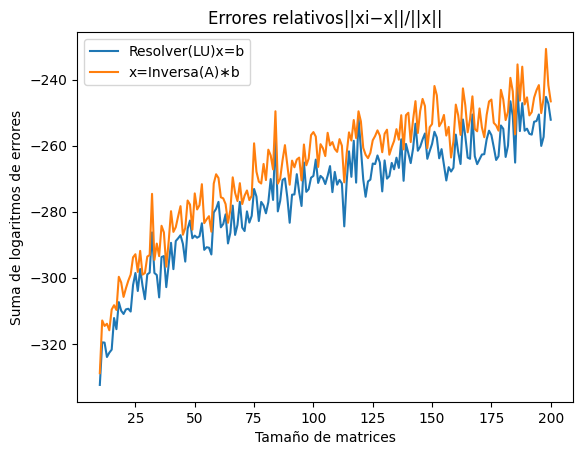

In [ ]:
v1, v2 = experimento_ej8(200)
n = np.arange(10, len(v1))
plt.plot(n,v1[10:],label='Resolver(LU)x=b')
plt.plot(n,v2[10:],label= 'x=Inversa(A)∗b')
plt.xlabel('Tamaño de matrices')
plt.ylabel('Suma de logaritmos de errores')
plt.title('Errores relativos||xi−x||/||x||')
plt.legend( )
plt.show( )

## Conclusión Ej 8

Se mantiene el mismo comportamiento que el Ej 7, ResolverLU es un poco mejor que la Inversa.

A diferencia del anterior gráfico, podemos ver que la diferencia entre ResolverLU e Inversa es mucho menor.

Ésto puede deberse a que no estamos multiplicando por A, que se traduce a menos errores de cálculo y una mayor precisión. Como se comentó en la conclusión del Ej7, tener menos cuentas implica que tengamos menos errores causados por la aritmética de punto flotante.

Entonces, con ésto justificamos que el error de la solución (b) del ejercicio 7 es menor que el error de la solución (x) del ejercicio 8.


Recordar el ejercicio 18b de la Práctica 2:

- $\frac{||x - \bar{x}||}{||x||} \leq $cond(A) $\frac{||b - \bar{b}||}{||b||} $

Esta propiedad implica que el error relativo generado en la solución es menor o igual, es decir, está acotado, por el error relativo de b por la condición de la matriz. Es decir, que el error relativo en la solución no puede ser mucho más grande que el error relativo en b multiplicado por el número de condición de la matriz. Si la matriz es mal condicionada, es decir, es su nro de condición es grande, significaría que pequeños errores en b pueden dar como resultado grandes errores en la solución x.

# Ejercicio 9

Función experimento_ej9: Repetimos lo hecho en ej 7 pero con funciones de numpy

--------------------------------

- **Input**: Entero (Int)

- **Output**: vectores $v_1, v_2  \in R^n$

In [ ]:
def experimento_ej9(m): #m denota hasta qué tamaño de matriz se quiere hacer (en el ej es hasta 200x200)
  #Generamos vectores v1 y v2 de ceros para ir grabando las sumas de los log de los errores de los items c y e
  v1 = np.zeros(m+1)
  v2 = np.zeros(m+1)

  for n in range (10,m+1): # medida de la matriz
    #Generamos un float para cada forma de cálculo (items b y d) donde iremos sumando los log de los errores
    suma_er1 = 0
    suma_er2 = 0

    for i in range (1,11): # las 10 repeticiones

      #ITEM 1

      #ITEM a Generamos matriz y vector aleatorios y calculamos b
      A = np.random.uniform(-1, 1, (n, n)) #Generamos la matriz aleatoria de nxn
      x = np.random.uniform(-1, 1, n) #Generamos el vector aleatorio x de tamaño n
      b = A@x #Definimos b

      #ITEM b Calculamos solución x1 mediante función linalg.solve de numpy
      x1 = np.linalg.solve(A,b)

      #ITEM c Calculamos error relativo
      er1= error_norma2(A,b,x1)

      #ITEM d Calculamos solución x2 mediante x2=A^(-1)*b utilizando función inversa de numpy
      x2 = np.linalg.inv(A)@b

      #ITEM e Calculamos error relativo
      er2= error_norma2(A,b,x2)

      #ITEM 2 Guardamos los errores relativos calculados mediante items b y c
      suma_er1 = suma_er1 + np.log(er1)
      #ITEM 3 Guardamos los errores relativos calculados mediante items d y e
      suma_er2 = suma_er2 + np.log(er2)

    #Agrego información en vector vi
    v1[n] = suma_er1
    v2[n] = suma_er2

  return v1 , v2

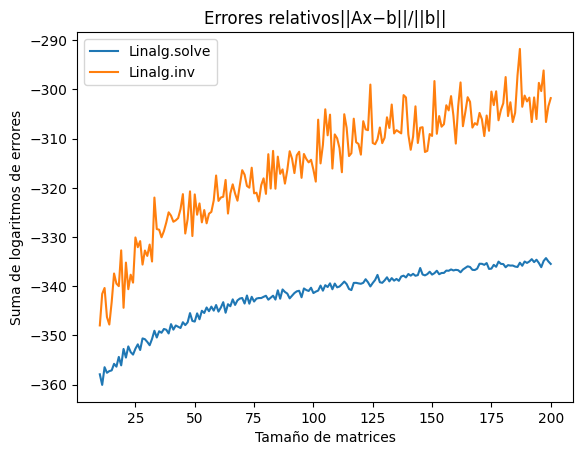

In [ ]:
v1, v2 = experimento_ej9(200)
n = np.arange(10, len(v1))
plt.plot(n,v1[10:],label='Linalg.solve')
plt.plot(n,v2[10:],label='Linalg.inv')
plt.xlabel('Tamaño de matrices')
plt.ylabel('Suma de logaritmos de errores')
plt.title('Errores relativos||Ax−b||/||b||')
plt.legend( )
plt.show( )

## Conclusión Ej 9 a)

Podemos observar que es el mismo comportamiento que el ejercicio 7, sólo que es más veloz y eficiente.


Otra observación es que los errores obtenidos en el ejercicio 9 son menores, pues las herramientas son más precisas (recordar que estamos utilizando numpy).

Función experimento_ej9_b : Replica experimentos del ej 8 pero con funciones de numpy

--------------------------------

- **Input**: Entero (Int)

- **Output**: vectores $v_1, v_2  \in R^n$

In [ ]:
def experimento_ej9_b(m): #m denota hasta qué tamaño de matriz se quiere hacer (en el ej es hasta 200x200)
  #Generamos vectores v1 y v2 de ceros para ir grabando las sumas de los log de los errores de los items c y e
  v1 = np.zeros(m+1)
  v2 = np.zeros(m+1)

  for n in range (10,m+1): # medida de la matriz
    #Generamos un float para cada forma de cálculo (items b y d) donde iremos sumando los log de los errores
    suma_er1 = 0
    suma_er2 = 0
    id = np.identity(n,dtype=float)

    for i in range (1,11): # las 10 repeticiones

      #ITEM 1

      #ITEM a Generamos matriz y vector aleatorios y calculamos b
      A = np.random.uniform(-1, 1, (n, n)) #Generamos la matriz aleatoria de nxn
      x = np.random.uniform(-1, 1, n) #Generamos el vector aleatorio x de tamaño n
      b = A@x #Definimos b

      #ITEM b Calculamos solución x1 mediante función linalg.solve de numpy
      x1 = np.linalg.solve(A,b)

      #ITEM c Calculamos error relativo de la solución x1 vs la solución original
      er1= error_norma2(id,x,x1)

      #ITEM d Calculamos solución x2 mediante x2=A^(-1)*b utilizando función inversa de numpy
      x2 = np.linalg.inv(A)@b

      #ITEM e Calculamos error relativo de la solución x2 vs la solución original
      er2= error_norma2(id,x,x2)

      #ITEM 2 Guardamos los errores relativos calculados mediante items b y c
      suma_er1 = suma_er1 + np.log(er1)
      #ITEM 3 Guardamos los errores relativos calculados mediante items d y e
      suma_er2 = suma_er2 + np.log(er2)

    #Agrego información en vector vi
    v1[n] = suma_er1
    v2[n] = suma_er2

  return v1 , v2

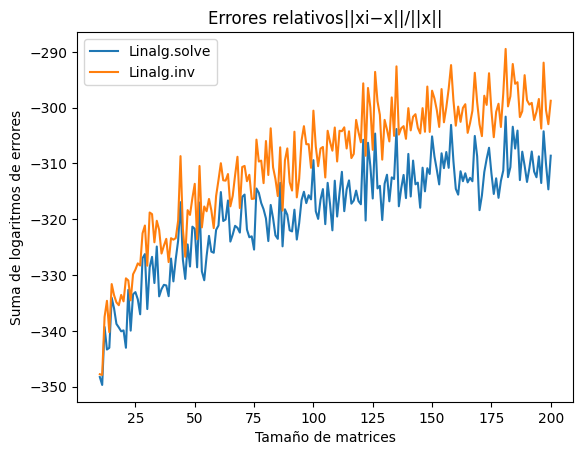

In [ ]:
v1, v2 = experimento_ej9_b(200)
n = np.arange(10, len(v1))
plt.plot(n,v1[10:],label='Linalg.solve')
plt.plot(n,v2[10:],label='Linalg.inv')
plt.xlabel('Tamaño de matrices')
plt.ylabel('Suma de logaritmos de errores')
plt.title('Errores relativos||xi−x||/||x||')
plt.legend( )
plt.show( )

## Conclusión Ej 9 b)


Podemos observar el mismo comportamiento que en el ejercicio 8, sólo que más veloz y eficiente.


Otra observación es que los errores obtenidos en el ejercicio 9 son menores, pues las herramientas son mejores (numpy).

# Ejercicio 10

Crearemos una función que me devuelve una matriz $A \in R^{n x n} $ tal que $ a_{ij} = \frac{1}{i + j -1}$


----------------------------


- **Input**: Tamaño $n$ (nat)

- **Output**: Matriz $A \in R^{n x n} $

In [ ]:
# Construcción de la matriz.

def crearMatriz(n):

  A = np.zeros((n, n))      # Genero una matriz de tamaño n x n, para luego irle completando los valores.

  for i in range(1, n+1):   # posición filas
    for j in range(1, n+1): # posición columnas
      A[i-1, j-1] = 1 / (i + j - 1) # calculo valores respecto a la posición actual

  return A



In [ ]:
crearMatriz(20)

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
        0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ,
        0.05882353, 0.05555556, 0.05263158, 0.05      , 0.04761905],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333,
        0.07692308, 0.07142857, 0.06666667, 0.0625    , 0.05882353,
        0.05555556, 0.05263158, 0.05      , 0.04761905, 0.04545455],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308,
        0.07142857, 0.06666667, 0.0625    , 0

Ahora definimos $Cond(A)$:

$Cond(A) = ||A|| \cdot ||A^{-1}||$


----------------------------------

Input: Matriz $ A \in R^{n x n}$

Output: Nat

In [ ]:
def cond(A):
  Ainv = np.linalg.inv(A)
  Ainv_norm = np.linalg.norm(Ainv)
  A_norm = np.linalg.norm(A)

  return A_norm * Ainv_norm

  #Luego vamos a utilizar el de Numpy, pues es mucho mejor que el implementado por nosotros.
  #np.linalg.cond

Repetimos el experimento del Ej 7 para n = 2, ..., 20 con este estilo de Matriz.

------------------------------------

- **Input**: Entero (Int)

- **Output**: vectores $v_1, v_2  \in R^n$

In [ ]:
def experimento_ej10(m): #m denota hasta qué tamaño de matriz se quiere hacer (en el ej es hasta 20x20)
  #Generamos vectores v1 y v2 de ceros para ir grabando las sumas de los log de los errores de los items c y e
  v1 = np.zeros(m+1)
  v2 = np.zeros(m+1)

  for n in range (2,m+1): # medida de la matriz, desde 2x2 hasta 20x20
    #Generamos un float para cada forma de cálculo (items b y d) donde iremos sumando los log de los errores
    suma_er1 = 0
    suma_er2 = 0
    A = crearMatriz(n)
    cond = np.linalg.cond(A)

    for i in range (1,11): # las 10 repeticiones

      #ITEM 1

      #ITEM a Generamos matriz y vector aleatorios y calculamos b
      x = np.random.uniform(-1, 1, n) #Generamos el vector aleatorio x de tamaño n
      b = A@x #Definimos b

      #ITEM b Calculamos solución x1 mediante función ResolverLU
      x1 = resolverLU(A,b)

      #ITEM c Calculamos error relativo
       #Calculamos norma 2 de b
      er1= error_norma2(A,b,x1)

      #ITEM d Calculamos solución x2 mediante x2=A^(-1)*b utilizando función inversa
      x2 = inversa(A)@b

      #ITEM e Calculamos error relativo
      #Calculamos norma 2 de (Ax1 - b)
      er2= error_norma2(A,b,x2)

      #ITEM 2 Guardamos los errores relativos calculados mediante items b y c

      suma_er1 = suma_er1 + np.log(er1)
      #ITEM 3 Guardamos los errores relativos calculados mediante items d y e

      suma_er2 = suma_er2 + np.log(er2)

    #Agrego información en vector vi
    v1[n] = suma_er1
    v2[n] = suma_er2

    print("Cond(A) para matriz de ",n,"x",n,"\n",cond, "\n")

  return v1 , v2

In [ ]:
v1, v2 = experimento_ej10(20)
print("v1 \n", v1)
print("v2 \n", v2, "\n")

<ipython-input-45-80ff477b2f98>:37: RuntimeWarning: divide by zero encountered in log
  suma_er1 = suma_er1 + np.log(er1)
<ipython-input-45-80ff477b2f98>:40: RuntimeWarning: divide by zero encountered in log
  suma_er2 = suma_er2 + np.log(er2)


Cond(A) para matriz de  2 x 2 
 19.28147006790397 

Cond(A) para matriz de  3 x 3 
 524.0567775860644 

Cond(A) para matriz de  4 x 4 
 15513.73873892924 

Cond(A) para matriz de  5 x 5 
 476607.2502425855 

Cond(A) para matriz de  6 x 6 
 14951058.642254734 

Cond(A) para matriz de  7 x 7 
 475367356.7446793 

Cond(A) para matriz de  8 x 8 
 15257575538.060041 

Cond(A) para matriz de  9 x 9 
 493153755941.02344 

Cond(A) para matriz de  10 x 10 
 16024416987428.36 

Cond(A) para matriz de  11 x 11 
 522270131654983.3 

Cond(A) para matriz de  12 x 12 
 1.7515952300879806e+16 

Cond(A) para matriz de  13 x 13 
 3.1883950689209334e+18 

Cond(A) para matriz de  14 x 14 
 6.200786281355982e+17 

Cond(A) para matriz de  15 x 15 
 3.67568286586649e+17 

Cond(A) para matriz de  16 x 16 
 7.046389953630175e+17 

Cond(A) para matriz de  17 x 17 
 1.249010044779401e+18 

Cond(A) para matriz de  18 x 18 
 2.2477642911280653e+18 

Cond(A) para matriz de  19 x 19 
 6.472700911391398e+18 

Cond(A)

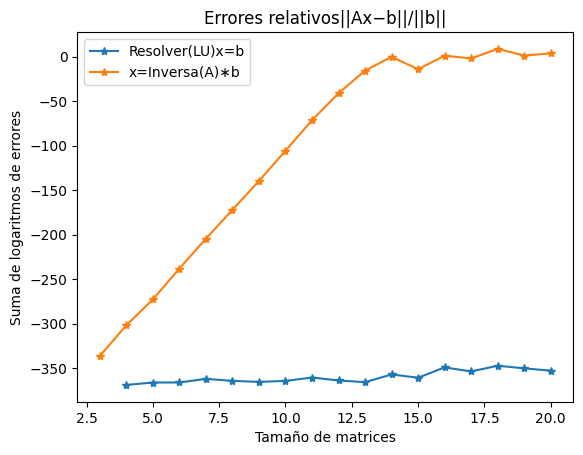

In [ ]:

n = np.arange(2, len(v1))
plt.plot(n,v1[2:],"-*",label='Resolver(LU)x=b')
plt.plot(n,v2[2:],"-*",label= 'x=Inversa(A)∗b')
plt.xlabel('Tamaño de matrices')
plt.ylabel('Suma de logaritmos de errores')
plt.title('Errores relativos||Ax−b||/||b||')
plt.legend( )
plt.show( )

## Conclusión Ej 10


Al tener la matriz de Hilbert, cuando hagamos los 10 bucles, solamente $x$ y $b$ van a cambiar. $x$ será aleatorio entre $[-1, 1)$, y b se calculará como $ A @ x$.


Podemos ver a través del gráfico que los errores son mayores resolviendo el sistema mediante la Inversa que mediante ResolverLU.


Los casos que dan -inf en $v_1$, $v_2$ significan que los errores son ínfimos.


Se puede ver que cuando el Número de Condición de la Matriz A se agranda, el error relativo de Inversa(A) también.


Es decir que el número de Condición nos da una idea de qué tan inversible es la matriz computacionalmente. Cuanto más grande es la condición, menos inversible es computacionalmente. Con esto queremos decir, que si la matriz es mal condicionada, el error relativo de la solución se incrementa. (como se explicó en la conclusión del ej8). Sumado a esto, resolver el sistema por medio de inversa implica mayor cantidad de cuentas, y por tanto, mayores redondeos debido a la precisión máquina, y por tanto mayores errores que se van acumulando. Por el contrario, ResolverLU, simplifica dichas cuentas, utilizando las matrices L y U que son triangulares superiores e inferiores, reduciendo considerablemente las cuentas, y por tanto, la posibilidad de acumular exponencialmente los errores. Esto se debe a la precisión limitada de las máquinas.

Un ejemplo de lo que puede suceder es lo que se conoce como el Error o Cancelación Catastrófica, que es cuando se pierden dígitos significativos al realizar alguna operación, por ejemplo una resta, haciendo que el error relativo se agrande considerablemente.

# Conclusión Final

Podemos concluir que siempre es mejor resolver por $LU$ que por Inversa.

Ésto se puede notar cuando la matriz va agrandándose.

Al resolver por $LU$ simplificamos más las cuentas y evitamos muchos errores catastróficos que podrían aparecer por la Inversa.

Podemos ver esto el ejercicio 10, donde el número de Condición de la matriz aumenta exponencialmente a medida que crece.

Cuando éstos errores de cálculo crecen, la matriz está cada vez mas lejos de ser inversible computacionalmente, y por ésta razón podemos ver lo ineficiente que es calcular por la Inversa.

Mismo en el ejercicio 9, que utilizamos herramientas de numpy, se puede ver la superioridad de linalg.solve contra la inversa.
